In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
%matplotlib inline

## Look at the CBIS data with abnormalities

In [2]:
# load the data
cbis_ddsm_slices = np.load(os.path.join("data", "all_slices.npy"))
cbis_ddsm_labels = np.load(os.path.join("data", "all_labels.npy"))
cbis_ddsm_names = np.load(os.path.join("data", "all_names.npy"))

# get some random images
N = 40
idxs = random.sample(range(len(cbis_ddsm_slices)), k=N)

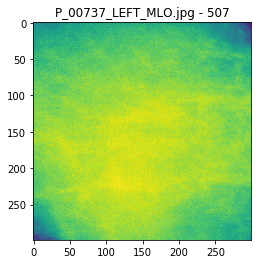

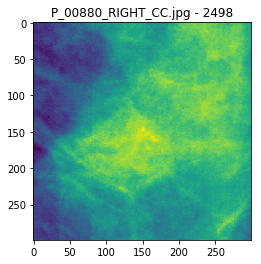

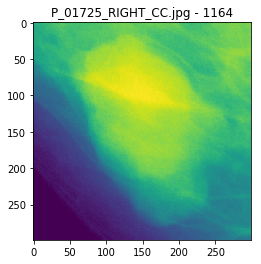

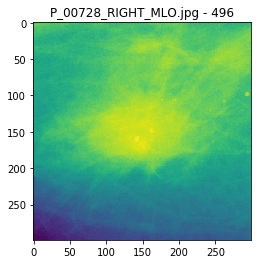

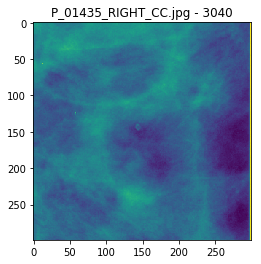

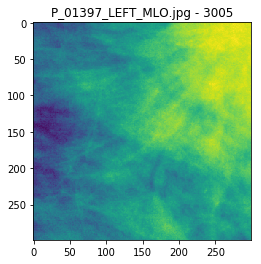

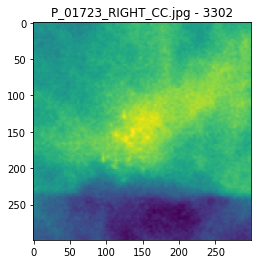

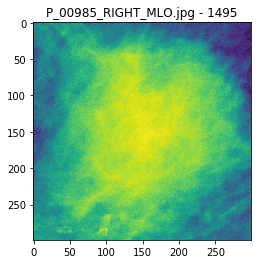

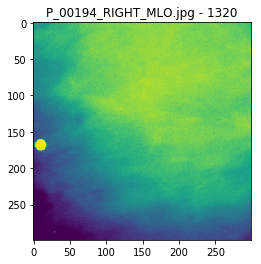

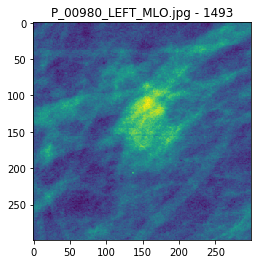

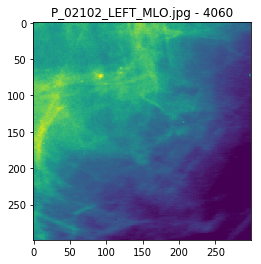

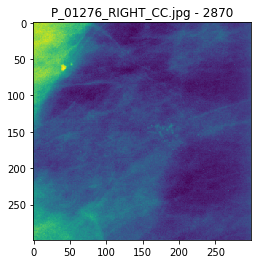

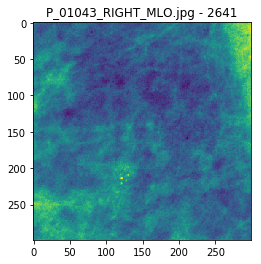

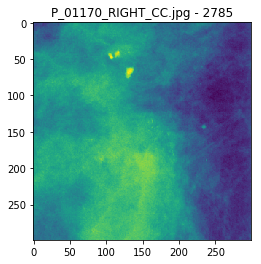

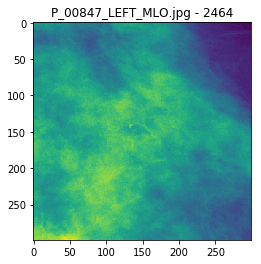

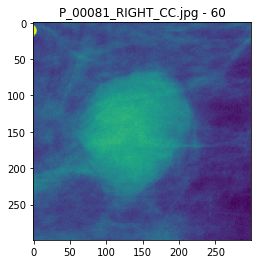

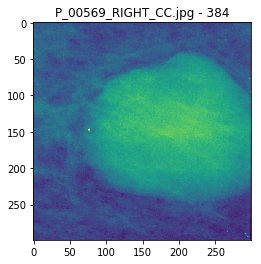

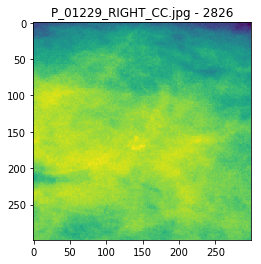

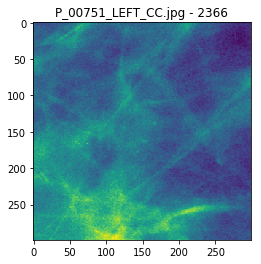

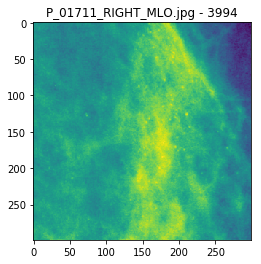

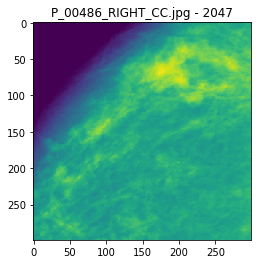

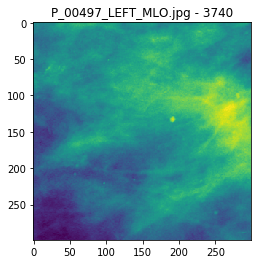

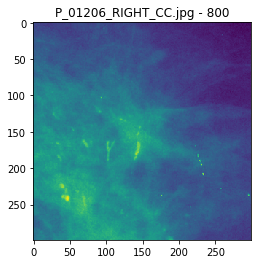

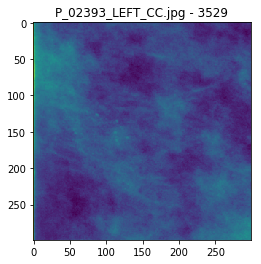

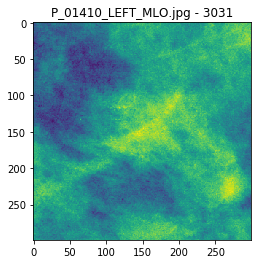

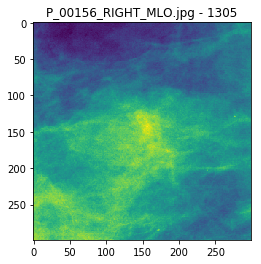

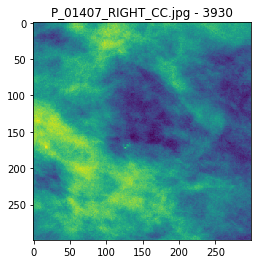

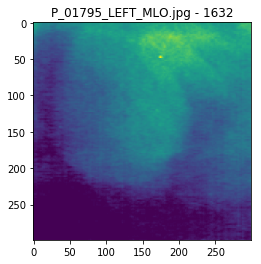

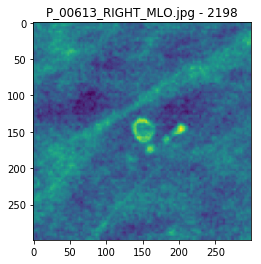

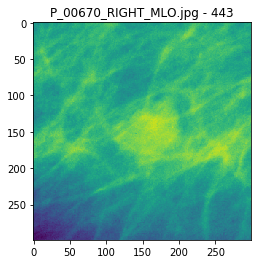

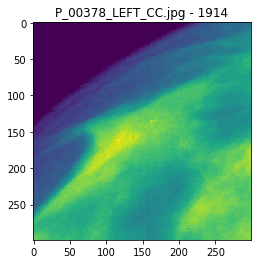

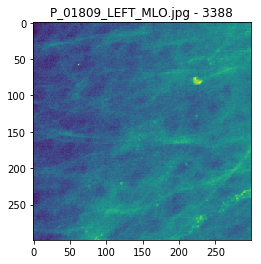

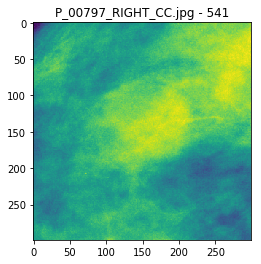

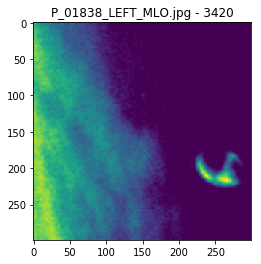

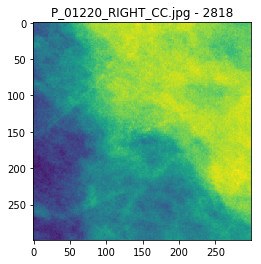

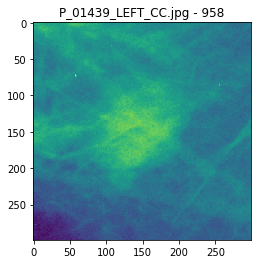

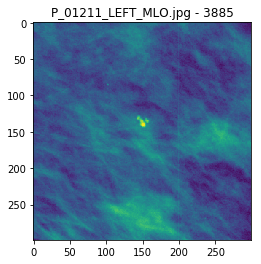

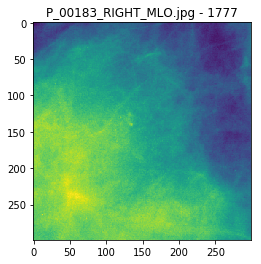

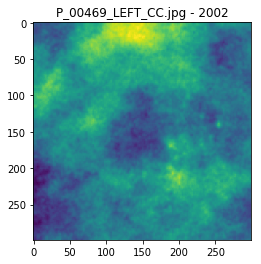

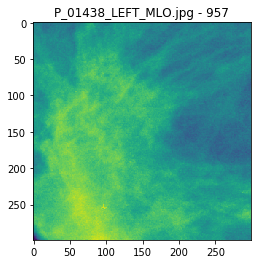

In [3]:
for idx in idxs:
    plt.imshow(cbis_ddsm_slices[idx].reshape(299,299))
    plt.title(cbis_ddsm_names[idx] + " - " + str(idx))
    plt.show()

## Look at some normal images

In [4]:
normal_slices = np.load(os.path.join("data", "image_batch_0.npy"))
normal_labels = np.load(os.path.join("data", "label_batch_0.npy"))

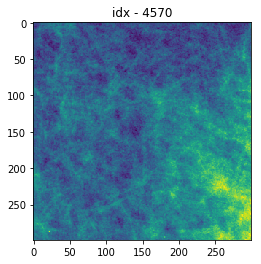

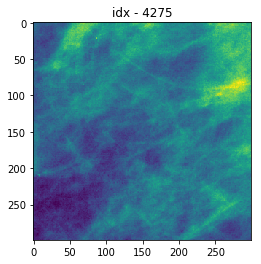

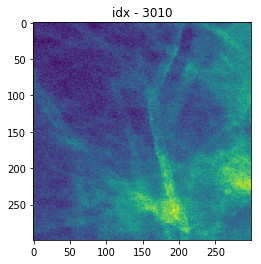

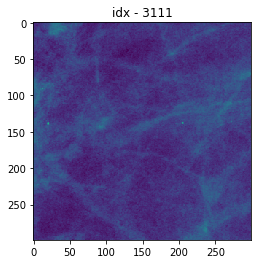

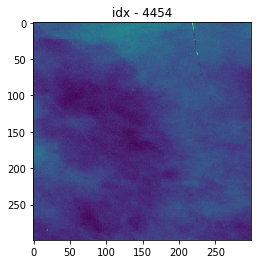

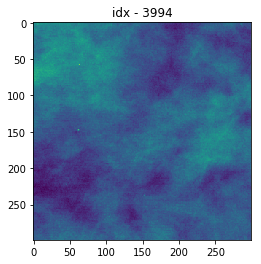

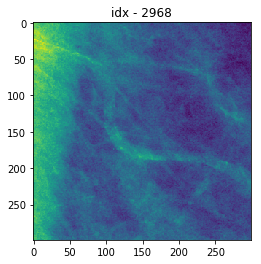

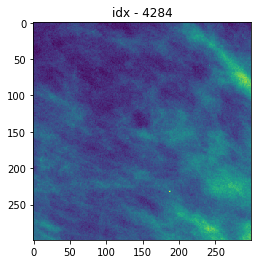

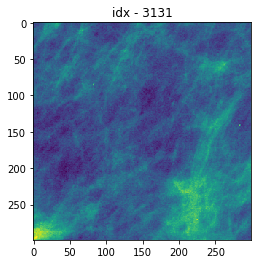

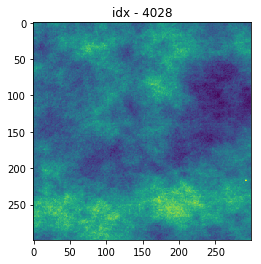

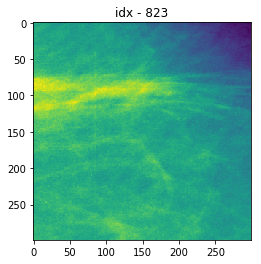

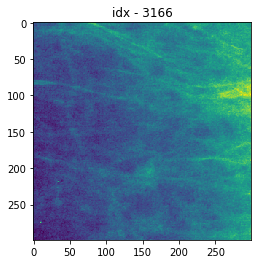

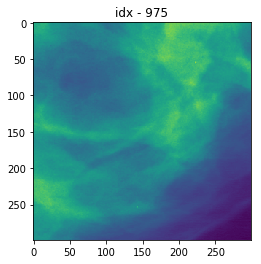

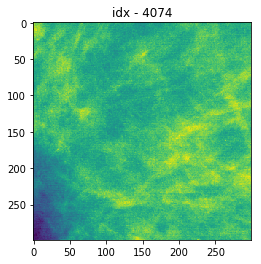

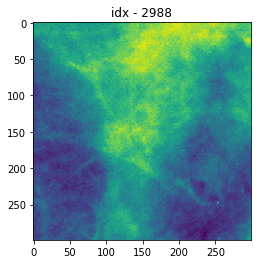

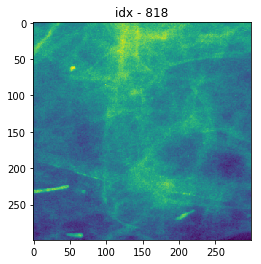

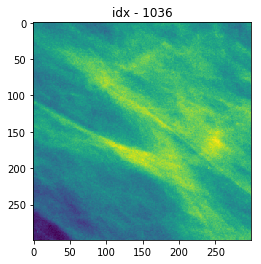

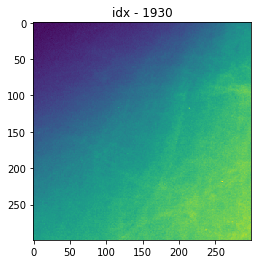

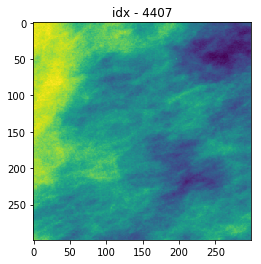

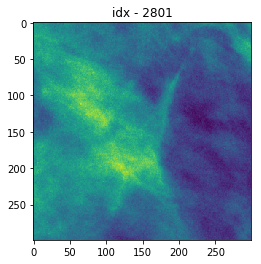

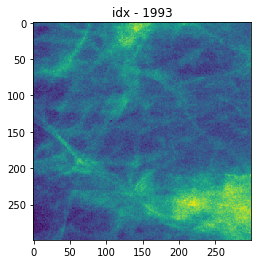

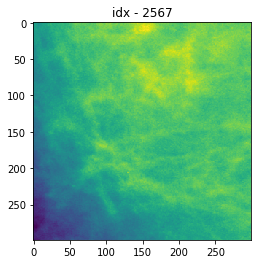

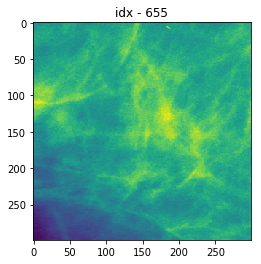

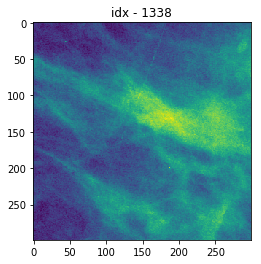

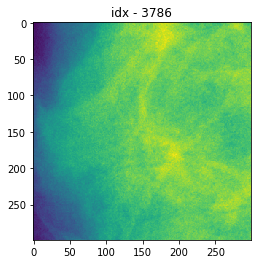

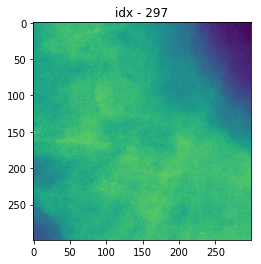

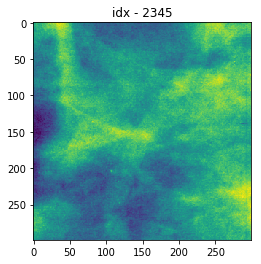

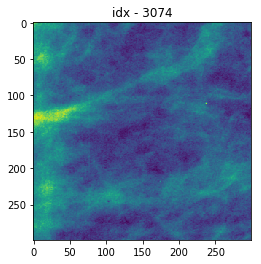

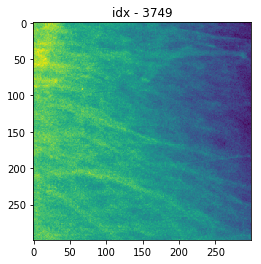

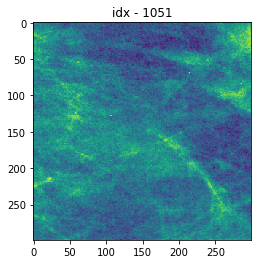

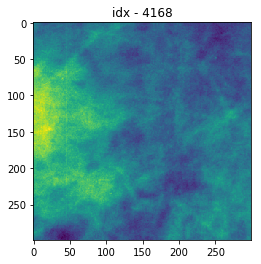

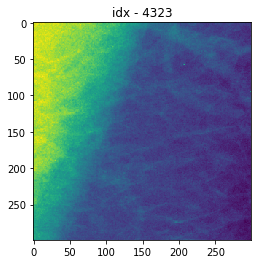

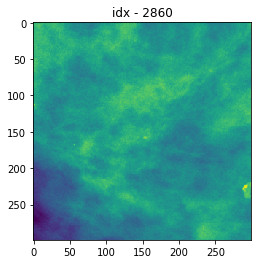

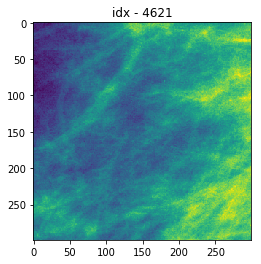

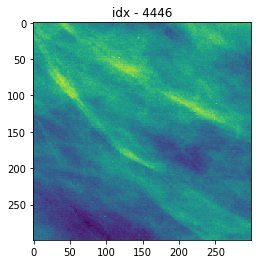

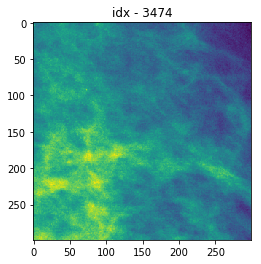

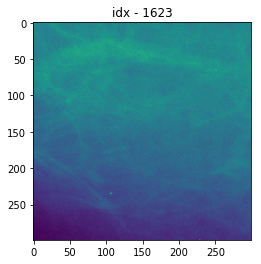

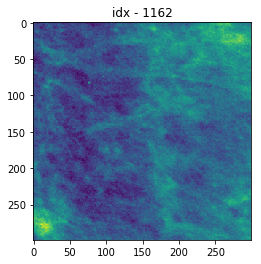

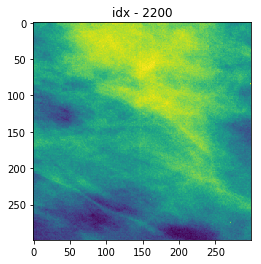

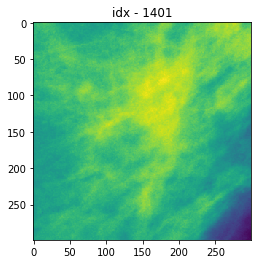

In [5]:
N = 40
idxs = random.sample(range(len(normal_slices)), k=N)

for idx in idxs:
    plt.imshow(normal_slices[idx].reshape(299,299))
    plt.title("idx - " + str(idx))
    plt.show()

This step was very useful for cleaning and augmenting the data. After having viewed samples of the images from both sets, I added some data augmentation steps to the cropping process, including trimming the white borders of images, zooming in on small ROIs and zooming out on large ROIs. 

The augmentation increased the number of usable abnormal slices significantly, so in order to keep the data balance I had to increase the number of normal slices.

## Get Average Size of CBIS Images

I want to use the MIAS data as test data and need to scale the images appropriately since the MIAS images are scaled down to 1024x1024 while the CBIS images are full size. To do this I will read in a directory of CBIS images and record their sizes. The scans appear to be more high than wide, so only the height will be recorded.

In [10]:
path = "E:\\Documents\\Mammography\\CBIS-DDSM\\Mass Train All JPEGs Full"

# get a list of all the images in the directory
files = os.listdir(path)

# initialize empty lists to hold the dimensions
image_heights = []
image_widths = []

# loop through the images and record their sizes
for file in files:
    img = Image.open(os.path.join(path, file))
    img_arr = np.array(img)
    image_heights.append(img_arr.shape[0])
    image_widths.append(img_arr.shape[1])

In [11]:
# save the data
np.save(os.path.join("data", "mass_train_image_heights.npy"), image_heights)
np.save(os.path.join("data", "mass_train_image_widths.npy"), image_widths)

In [14]:
print("Mean Height:", np.mean(image_heights))
print("Median Height:", np.median(image_heights))
print("Std Height:", np.std(image_heights))

print("\nMean Width:", np.mean(image_widths))
print("Median Width:", np.median(image_widths))
print("Std Width:", np.std(image_widths))

Mean Height: 5295.467099918766
Median Height: 5281.0
Std Height: 667.9888996980858

Mean Width: 3131.6945572705117
Median Width: 3000.0
Std Width: 540.4605620520878


In [18]:
# Since we are scaling the CBIS images by 1/2 before extracting the ROI we should do the same to the mean height
scaled_mean_height = np.mean(image_heights) // 2
print("Scaled Mean Height:", scaled_mean_height)

mias_scale_factor = scaled_mean_height / 1024
print("MIAS Scale Factor:", mias_scale_factor)

Scaled Mean Height: 2647.0
MIAS Scale Factor: 2.5849609375


The MIAS images should be increased in size by a factor of 2.5 to have them on the same scale as the CBIS images.